In [1]:
!pip install --upgrade setuptools pip --user
!pip install --ignore-installed PyYAML
!pip install Pillow

!pip install nvidia-pyindex
!pip install --upgrade nvidia-tensorrt
!pip install pycuda

!pip install protobuf<4.21.3
!pip install onnxruntime-gpu
!pip install onnx>=1.9.0
!pip install onnx-simplifier>=0.3.6 --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 29.2 MB/s 
     |████████████████████████████████| 2.0 MB 58.3 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.3/596.3 kB 33.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-pyindex: filename=nvidia_pyindex-1.0.9-py3-none-any.whl size=8419 sha256=5ad2b7a64eb6e571f25350b3af9b80b91ce588ddc5fe333c3468db4672fde1bb
  Stored in directory: /root/.cache/pip/wheels/f1/a1/a1/6cc45cc1ae6b1876f12ef399c0d0d6e18809e9ced611c7c2a7
Successfully built nvidia-pyindex
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.9/340.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (set

In [2]:
import sys
import torch
print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0], sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0) 
Pytorch version: 1.12.1+cu113 


In [ ]:
!nvidia-smi

In [4]:
!# Download YOLOv7 code
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!ls

Cloning into 'yolov7'...
remote: Enumerating objects: 756, done.
remote: Counting objects: 100% (756/756), done.
remote: Compressing objects: 100% (361/361), done.
remote: Total 756 (delta 397), reused 704 (delta 380), pack-reused 0
Receiving objects: 100% (756/756), 67.44 MiB | 35.91 MiB/s, done.
Resolving deltas: 100% (397/397), done.
/content/yolov7
cfg	detect.py  hubconf.py  models	  requirements.txt  tools	  utils
data	export.py  inference   paper	  scripts	    train_aux.py
deploy	figure	   LICENSE.md  README.md  test.py	    train.py


In [ ]:
!# Download trained weights
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt

In [5]:
!python detect.py --weights /content/best.pt --conf 0.25 --img-size 960 --source /content/crop20percentwith20percentquad_1.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=960, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/crop20percentwith20percentquad_1.jpg', update=False, view_img=False, weights=['/content/best.pt'])
YOLOR 🚀 v0.1-107-g44d8ab4 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done.

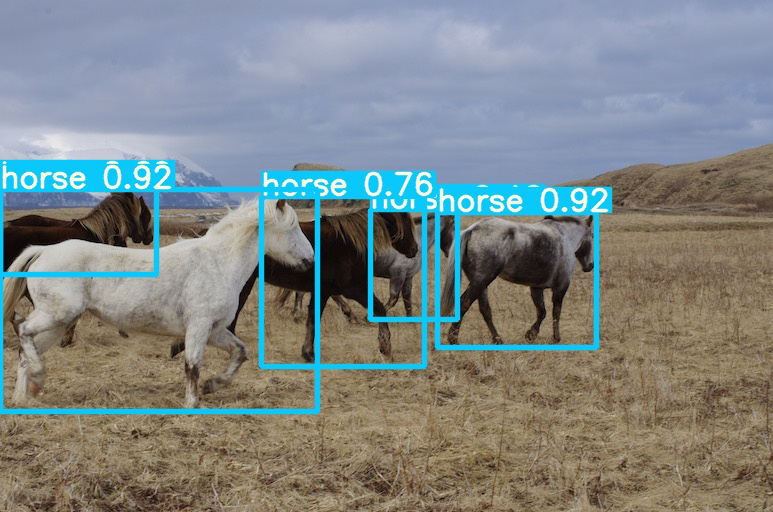

In [ ]:
from PIL import Image
Image.open('/content/yolov7/runs/detect/exp/horses.jpg')

In [6]:
# export temporary ONNX model for TensorRT converter
!python export.py --weights /content/best.pt --grid --end2end --simplify --topk-all 100 --iou-thres 0.5 --conf-thres 0.1 --img-size 960 960
!ls

Import onnx_graphsurgeon failure: No module named 'onnx_graphsurgeon'
Namespace(batch_size=1, conf_thres=0.1, device='cpu', dynamic=False, dynamic_batch=False, end2end=True, fp16=False, grid=True, img_size=[960, 960], include_nms=False, int8=False, iou_thres=0.5, max_wh=None, simplify=True, topk_all=100, weights='/content/best.pt')
YOLOR 🚀 v0.1-107-g44d8ab4 torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

Starting TorchScript export with torch 1.12.1+cu113...
/content/yolov7/models/yolo.py:150: TracerWarning: Converting a tensor to

In [7]:
# Download ONNX to TensorRT converter
%cd ../
!git clone https://github.com/Linaom1214/tensorrt-python.git

/content
Cloning into 'tensorrt-python'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 228 (delta 48), reused 47 (delta 14), pack-reused 126
Receiving objects: 100% (228/228), 76.88 MiB | 52.73 MiB/s, done.
Resolving deltas: 100% (103/103), done.


In [8]:
%cd tensorrt-python
!ls

/content/tensorrt-python
cpp		export.py	README_CN.md  src     utils
Examples.ipynb	image_batch.py	README.md     trt.py


In [9]:
# Export TensorRT-engine model 
!python export.py -o /content/best.onnx -e ./best-nms.trt -p fp16

Namespace(calib_batch_size=8, calib_cache='./calibration.cache', calib_input=None, calib_num_images=5000, conf_thres=0.4, end2end=False, engine='./best-nms.trt', iou_thres=0.5, max_det=100, onnx='/content/best.onnx', precision='fp16', verbose=False, workspace=1)
[08/30/2022-12:18:17] [TRT] [I] [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 0, GPU 244 (MiB)
[08/30/2022-12:18:19] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +0, GPU +68, now: CPU 0, GPU 312 (MiB)
export.py:109: DeprecationWarning: Use set_memory_pool_limit instead.
  self.config.max_workspace_size = workspace * (2 ** 30)
[08/30/2022-12:18:19] [TRT] [W] onnx2trt_utils.cpp:369: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.
[08/30/2022-12:18:19] [TRT] [W] onnx2trt_utils.cpp:395: One or more weights outside the range of INT32 was clamped
[08/30/2022-12:18:19] [TRT] [I] No importer registered for op: EfficientNMS_TRT

In [10]:
import cv2
import torch
import random
import time
import numpy as np
import tensorrt as trt
from PIL import Image
from pathlib import Path
from collections import OrderedDict,namedtuple

In [13]:
w = '/content/tensorrt-python/best-nms.trt'
device = torch.device('cuda:0')
img = cv2.imread('/content/crop20percentwith20percentquad_1.jpg')

In [16]:
# Infer TensorRT Engine
Binding = namedtuple('Binding', ('name', 'dtype', 'shape', 'data', 'ptr'))
logger = trt.Logger(trt.Logger.INFO)
trt.init_libnvinfer_plugins(logger, namespace="")
with open(w, 'rb') as f, trt.Runtime(logger) as runtime:
    model = runtime.deserialize_cuda_engine(f.read())
bindings = OrderedDict()
for index in range(model.num_bindings):
    name = model.get_binding_name(index)
    dtype = trt.nptype(model.get_binding_dtype(index))
    shape = tuple(model.get_binding_shape(index))
    data = torch.from_numpy(np.empty(shape, dtype=np.dtype(dtype))).to(device)
    bindings[name] = Binding(name, dtype, shape, data, int(data.data_ptr()))
binding_addrs = OrderedDict((n, d.ptr) for n, d in bindings.items())
context = model.create_execution_context()


def letterbox(im, new_shape=(960, 960), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

def postprocess(boxes,r,dwdh):
    dwdh = torch.tensor(dwdh*2).to(boxes.device)
    boxes -= dwdh
    boxes /= r
    return boxes

names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 
         'hair drier', 'toothbrush']
colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

In [20]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = img.copy()
image, ratio, dwdh = letterbox(image, auto=False)
image = image.transpose((2, 0, 1))
image = np.expand_dims(image, 0)
image = np.ascontiguousarray(image)

im = image.astype(np.float32)
im.shape

(1, 3, 960, 960)

Cost 0.01588531300012619 s


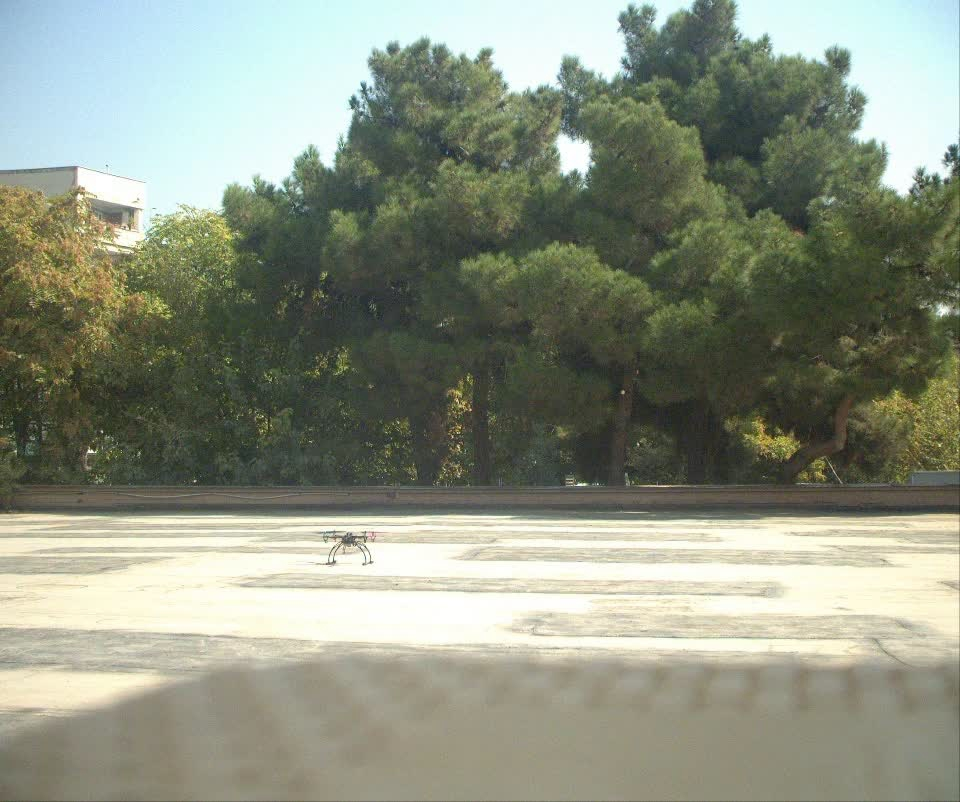

In [21]:
im = torch.from_numpy(im).to(device)
im/=255
im.shape

# warmup for 10 times
for _ in range(10):
    tmp = torch.randn(1,3,960,960).to(device)
    binding_addrs['images'] = int(tmp.data_ptr())
    context.execute_v2(list(binding_addrs.values()))

start = time.perf_counter()
binding_addrs['images'] = int(im.data_ptr())
context.execute_v2(list(binding_addrs.values()))
print(f'Cost {time.perf_counter()-start} s')

nums = bindings['num_dets'].data
boxes = bindings['det_boxes'].data
scores = bindings['det_scores'].data
classes = bindings['det_classes'].data
nums.shape,boxes.shape,scores.shape,classes.shape

boxes = boxes[0,:nums[0][0]]
scores = scores[0,:nums[0][0]]
classes = classes[0,:nums[0][0]]

for box,score,cl in zip(boxes,scores,classes):
    box = postprocess(box,ratio,dwdh).round().int()
    name = names[cl]
    color = colors[name]
    name += ' ' + str(round(float(score),3))
    cv2.rectangle(img,box[:2].tolist(),box[2:].tolist(),color,2)
    cv2.putText(img,name,(int(box[0]), int(box[1]) - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,color,thickness=2)

Image.fromarray(img)